<a href="https://colab.research.google.com/github/fahadiqbal1175/Pill_YOLOv11/blob/main/Panadol_Pill_YOLOv11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!nvidia-smi


Wed Dec 17 20:44:19 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [12]:
!pip install ultralytics roboflow


In [14]:
from ultralytics import YOLO


In [15]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="tboC49f87cK9XGbo5tbm")
project = rf.workspace("fahads-workspace-g7cbq").project("panadol-pill-detection")
version = project.version(3)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to panadol-pill-detection-3 in yolov11:: 100%|██████████| 1346/1346 [00:00<00:00, 1519.84it/s]


In [17]:
!cat /content/panadol-pill-detection-3/data.yaml


train: ../train/images
val: ../valid/images
test: ../test/images

nc: 4
names: ['myteka', 'panadol', 'risek', 'ventolin']

roboflow:
  workspace: fahads-workspace-g7cbq
  project: panadol-pill-detection
  version: 3
  license: CC BY 4.0
  url: https://universe.roboflow.com/fahads-workspace-g7cbq/panadol-pill-detection/dataset/3

In [18]:
from ultralytics import YOLO
model = YOLO("yolo11s.pt")  # small version (fast)

In [19]:
model.train(
    data="/content/panadol-pill-detection-3/data.yaml",
    epochs=80,
    imgsz=640,
    batch=16,
    name="multi_pill_yolo11"
)


Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/panadol-pill-detection-3/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=80, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=multi_pill_yolo11, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspect

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e7cacb08e00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

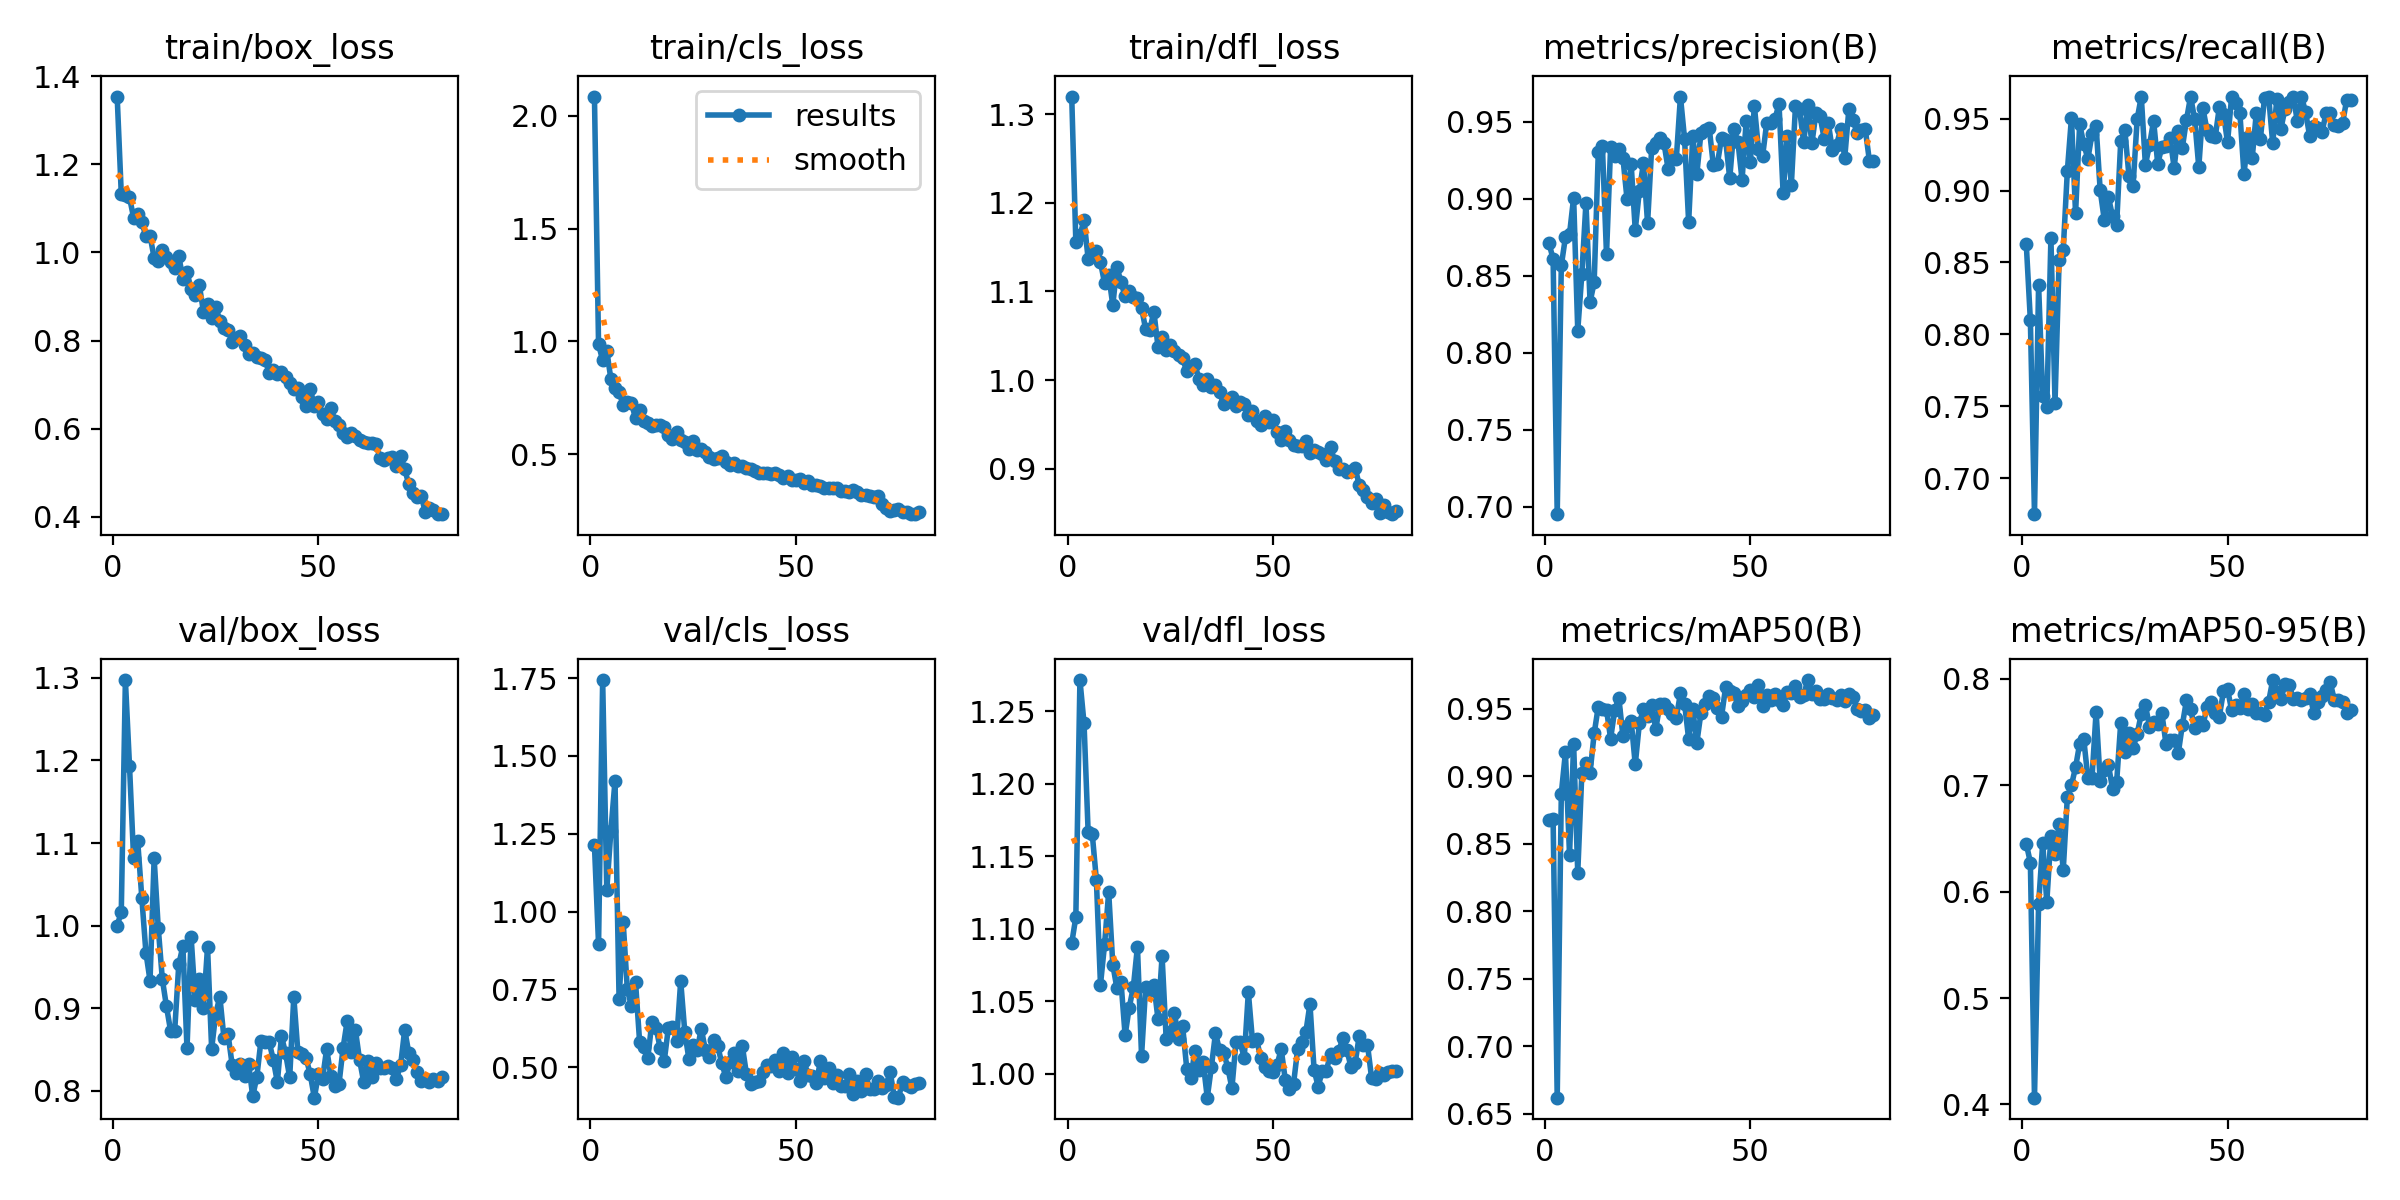

In [20]:
from IPython.display import Image
Image("runs/detect/multi_pill_yolo11/results.png")


In [21]:
model = YOLO("runs/detect/multi_pill_yolo11/weights/best.pt")

model.predict(
    source="/content/panadol-pill-detection-3/test/images",
    conf=0.25,
    save=True
)



image 1/13 /content/panadol-pill-detection-3/test/images/IMG_20251216_210333_jpg.rf.f0731a3e189c1f86070cc1c3617d17f7.jpg: 512x640 (no detections), 56.4ms
image 2/13 /content/panadol-pill-detection-3/test/images/WhatsApp-Image-2025-12-16-at-9-06-11-PM-1-_jpeg.rf.b9d2ef2ba7084abeaaa23c2cdf8fe2c5.jpg: 640x480 1 myteka, 1 ventolin, 54.3ms
image 3/13 /content/panadol-pill-detection-3/test/images/WhatsApp-Image-2025-12-16-at-9-06-12-PM_jpeg.rf.83daededa191cde9871bdada7cdbbdbc.jpg: 640x480 1 panadol, 12.4ms
image 4/13 /content/panadol-pill-detection-3/test/images/WhatsApp-Image-2025-12-16-at-9-06-29-PM_jpeg.rf.a2d7f57ac659b4c570693c57d013cf0e.jpg: 480x640 1 panadol, 1 ventolin, 60.0ms
image 5/13 /content/panadol-pill-detection-3/test/images/WhatsApp-Image-2025-12-16-at-9-06-31-PM_jpeg.rf.c3a7a3bb54b1b99275e4c50761676ed1.jpg: 480x640 1 myteka, 12.4ms
image 6/13 /content/panadol-pill-detection-3/test/images/WhatsApp-Image-2025-12-16-at-9-06-40-PM_jpeg.rf.2c1d8c60dc0821aaea859dc4ef107c0e.jpg: 6

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'myteka', 1: 'panadol', 2: 'risek', 3: 'ventolin'}
 obb: None
 orig_img: array([[[212, 210, 222],
         [211, 209, 221],
         [210, 208, 220],
         ...,
         [193, 198, 213],
         [193, 198, 213],
         [192, 197, 212]],
 
        [[204, 202, 214],
         [205, 203, 215],
         [205, 203, 215],
         ...,
         [195, 200, 215],
         [193, 198, 213],
         [192, 197, 212]],
 
        [[209, 207, 219],
         [208, 206, 218],
         [207, 205, 217],
         ...,
         [196, 201, 216],
         [194, 199, 214],
         [191, 196, 211]],
 
        ...,
 
        [[195, 208, 206],
         [193, 206, 204],
         [193, 206, 204],
         ...,
         [ 50,  65,  74],
         [ 48,  63,  72],
         [ 47,  62,  71]],
 
        [[195, 208, 206],
         [194, 207, 205],
         [193, 20

In [22]:
from google.colab import files
files.upload()


Saving IMG_20251217_111103.jpg to IMG_20251217_111103.jpg


{'IMG_20251217_111103.jpg': b'\xff\xd8\xff\xe1\x05aExif\x00\x00II*\x00\x08\x00\x00\x00\x10\x00\x99\x99\x02\x00\x84\x00\x00\x00\xce\x00\x00\x00\x9a\x88\x01\x00\x01\x00\x00\x00\x00\x00\x00\x00\x01\x01\x03\x00\x01\x00\x00\x00\x00\x0c\x00\x00\x0f\x01\x02\x00\x07\x00\x00\x00R\x01\x00\x00\x12\x01\x03\x00\x01\x00\x00\x00\x06\x00\x00\x002\x01\x02\x00\x14\x00\x00\x00Y\x01\x00\x00\x1b\x01\x05\x00\x01\x00\x00\x00m\x01\x00\x00\x1a\x01\x05\x00\x01\x00\x00\x00u\x01\x00\x00\x00\x01\x03\x00\x01\x00\x00\x00\xf0\x0f\x00\x00\x10\x01\x02\x00\t\x00\x00\x00}\x01\x00\x001\x01\x02\x00 \x00\x00\x00\x86\x01\x00\x00\x0e\x01\x02\x00 \x00\x00\x00\xa6\x01\x00\x00\x13\x02\x03\x00\x01\x00\x00\x00\x02\x00\x00\x00i\x87\x04\x00\x01\x00\x00\x00\xcf\x01\x00\x00(\x01\x03\x00\x01\x00\x00\x00\x02\x00\x00\x00\x00\x9a\x02\x00\t\x00\x00\x00\xc6\x01\x00\x00\xe3\x04\x00\x00{"mirror":false,"sensorType":"rear","Hdr":"auto","OpMode":36869,"smallPicture":false,"AIScene":0,"filterId":66048,"zoomMultiple":1}\x00Xiaomi\x002025:12:17 11:

In [23]:
model.predict(
    source="/content/IMG_20251217_111103.jpg",
    conf=0.3,
    save=True
)



image 1/1 /content/IMG_20251217_111103.jpg: 640x512 1 ventolin, 64.0ms
Speed: 5.0ms preprocess, 64.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)
Results saved to /content/runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'myteka', 1: 'panadol', 2: 'risek', 3: 'ventolin'}
 obb: None
 orig_img: array([[[ 70,  89, 110],
         [ 64,  83, 104],
         [ 63,  82, 103],
         ...,
         [ 73, 100, 126],
         [ 69,  96, 122],
         [ 67,  94, 120]],
 
        [[ 64,  83, 104],
         [ 51,  70,  91],
         [ 54,  73,  94],
         ...,
         [ 71,  98, 124],
         [ 68,  95, 121],
         [ 66,  93, 119]],
 
        [[ 64,  83, 104],
         [ 63,  82, 103],
         [ 50,  69,  90],
         ...,
         [ 71,  98, 124],
         [ 70,  97, 123],
         [ 69,  96, 122]],
 
        ...,
 
        [[ 29,  31,  62],
         [ 24,  26,  57],
         [ 23,  25,  56],
         ...,
         [ 27,  31,  49],
         [ 28,  32,  50],
         [ 33,  37,  55]],
 
        [[ 24,  25,  59],
         [ 24,  25,  59],
         [ 25,  2

In [27]:
from roboflow import Roboflow

# Re-initialize Roboflow project and dataset to ensure 'project' is defined
rf = Roboflow(api_key="tboC49f87cK9XGbo5tbm")
project = rf.workspace("fahads-workspace-g7cbq").project("panadol-pill-detection")
version = project.version(3)
dataset = version.download("yolov11")

# Define HOME for the model path
HOME = '/content'

# Corrected model_path to point to the actual training output directory
project.version(dataset.version).deploy(model_type="yolov11", model_path=f"{HOME}/runs/detect/multi_pill_yolo11/")

loading Roboflow workspace...
loading Roboflow project...
View the status of your deployment at: https://app.roboflow.com/fahads-workspace-g7cbq/panadol-pill-detection/3
Share your model with the world at: https://universe.roboflow.com/fahads-workspace-g7cbq/panadol-pill-detection/model/3
